In [0]:
# import comet_ml in the top of your file
from comet_ml import Experiment

# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="tC4A7YA778cHBZYNZqwsXDpRx",
                        project_name="general", workspace="pratikkulkarni228")


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/pratikkulkarni228/general/514ae42a35884ef88bdd918d491e02b7



In [0]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

import numpy as np
import pickle



ModuleNotFoundError: No module named 'keras'

In [0]:
# dimensions of our images.
img_width, img_height =  598,434

data_file = open('msft.pickle','rb')
dataset=pickle.load(data_file)

train_X = dataset['train_X']
train_y = dataset['train_y']

test_X = dataset['test_X']
test_y = dataset['test_y']


#Pre processing data
train_X = np.reshape(train_X,newshape=(train_X.shape[0],1,train_X.shape[1],train_X.shape[2]))
test_X = np.reshape(test_X,newshape=(test_X.shape[0],1,test_X.shape[1],test_X.shape[2]))

#Normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255
test_X /= 255


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(1,598,434),data_format='channels_first'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(3)) #3 classes
model.add(Activation('softmax'))


sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 596, 432)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 596, 432)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 298, 432)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 296, 64)       248896    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 296, 64)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 148, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 66304)             0         
__________

In [0]:
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
635/635 [==============================] - 9s 14ms/step - loss: 1.1198 - acc: 0.3559
Epoch 2/50
635/635 [==============================] - 6s 9ms/step - loss: 1.0836 - acc: 0.4110
Epoch 3/50
635/635 [==============================] - 6s 9ms/step - loss: 1.0552 - acc: 0.4724
Epoch 4/50
635/635 [==============================] - 6s 9ms/step - loss: 1.0511 - acc: 0.4677
Epoch 5/50
635/635 [==============================] - 6s 9ms/step - loss: 1.0181 - acc: 0.5213
Epoch 6/50
635/635 [==============================] - 6s 9ms/step - loss: 0.9933 - acc: 0.5543
Epoch 7/50
635/635 [==============================] - 6s 9ms/step - loss: 0.9334 - acc: 0.5827
Epoch 8/50
635/635 [==============================] - 5s 9ms/step - loss: 0.9539 - acc: 0.5811
Epoch 9/50
635/635 [==============================] - 6s 9ms/step - loss: 0.8724 - acc: 0.6189
Epoch 10/50
635/635 [==============================] - 6s 9ms/step - loss: 0.8091 - acc: 0.6929
Epoch 11/50
635/635 [===========================

In [0]:
model.save_weights('98_acc.h5')  # always save your weights after training or during training



In [0]:
score = model.predict(test_X)

In [0]:
print(score)

[[5.02034366e-01 1.37843229e-02 4.84181345e-01]
 [9.84735966e-01 3.77726764e-03 1.14867585e-02]
 [9.59308147e-01 3.69465761e-02 3.74518591e-03]
 [9.87557411e-01 5.59256459e-03 6.85001723e-03]
 [9.96387482e-01 1.84090738e-03 1.77152851e-03]
 [9.98851418e-01 2.57640175e-04 8.90917087e-04]
 [8.13063979e-01 2.24028863e-02 1.64533094e-01]
 [9.96794045e-01 1.56255427e-03 1.64337503e-03]
 [9.97755945e-01 4.63162869e-04 1.78093428e-03]
 [9.99009967e-01 2.49917939e-04 7.39988289e-04]
 [9.70069587e-01 2.58883014e-02 4.04215883e-03]
 [9.98402655e-01 5.84589667e-04 1.01271737e-03]
 [9.98280406e-01 1.15723826e-03 5.62456436e-04]
 [9.98634875e-01 2.64775852e-04 1.10034575e-03]
 [9.99213219e-01 1.98598646e-04 5.88220486e-04]
 [9.80917096e-01 6.51569758e-03 1.25671588e-02]
 [1.46560778e-04 9.99851465e-01 1.90130231e-06]
 [9.86438990e-01 4.75879293e-03 8.80226493e-03]
 [9.78745997e-01 6.82992395e-03 1.44240018e-02]
 [8.81221294e-01 1.72279272e-02 1.01550713e-01]
 [9.08869267e-01 1.51349185e-02 7.599582

In [0]:
y_pred = score.argmax(axis=-1)

In [0]:
y_test = test_y.argmax(axis=-1)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test, y_pred)


In [0]:
print(cm)

[[37  3  0]
 [ 0 13  0]
 [ 0  0 13]]


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


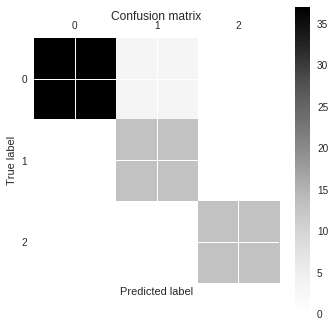

In [0]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()